## I broke the SimpleGPs notebook, so instead here's some example made by following along with the PyMC3 documentation

In [1]:
%matplotlib inline
from pymc3 import *

import numpy as np
import matplotlib.pyplot as plt

### Let's do some Gaussian Process regression

- start with a line
- add some noise
- sample some points
- use GPs to find the line

In [2]:
n = 100
true_intercept = 1
true_slope = 2

X = np.linspace(0, 10, n)

true_line = true_intercept + true_slope * X
y = true_line + np.random.normal(size=n)

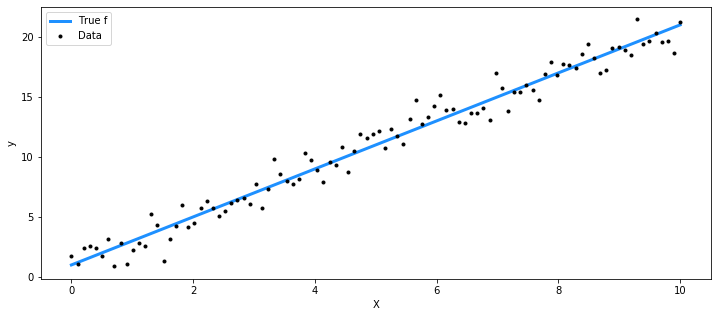

In [3]:
fig = plt.figure(figsize=(12,5)); ax = fig.gca()
ax.plot(X, true_line, "dodgerblue", lw=3, label="True f");
ax.plot(X, y, 'ok', ms=3, label="Data");
ax.set_xlabel("X"); ax.set_ylabel("y"); plt.legend();

#placeholder


In [21]:
with Model() as model:
    # priors:
    sigma = Normal('sigma', 1, sd=10, testval=1.0)
    intercept = Normal('intercept', 1, sd=10)
    slope = Normal('slope', 0, sd=20)
    
    # likelihood
    likelihood = Normal('y', mu=intercept + slope *X,
                       sd=sigma, observed=y)
    
    cov = gp.cov.ExpQuad(1, ls=1.0)
    gp_ = gp.Marginal(cov_func=cov)
    
    trace = sample(tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [slope, intercept, sigma]
Sampling 2 chains, 0 divergences: 100%|██████████| 3000/3000 [00:02<00:00, 1061.33draws/s]


#placeholder


/Users/admin/Library/Python/3.7/lib/python/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/Users/admin/Library/Python/3.7/lib/python/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/Users/admin/Library/Python/3.7/lib/python/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate

<Figure size 504x504 with 0 Axes>

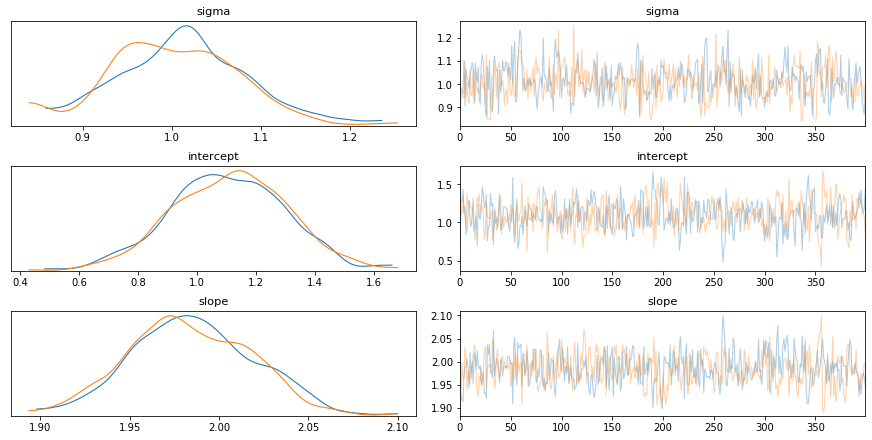

In [22]:
plt.figure(figsize=(7, 7))
traceplot(trace[100:])
plt.tight_layout(100);

In [23]:
summary(trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
sigma,1.007,0.071,0.891,1.162,0.003,0.002,492.0,492.0,494.0,443.0,1.0
intercept,1.107,0.193,0.754,1.465,0.008,0.006,581.0,556.0,581.0,610.0,1.0
slope,1.984,0.034,1.925,2.049,0.001,0.001,598.0,598.0,591.0,430.0,1.0


In [24]:
#trace['intercept']
X_new = np.linspace(0, 10, 10)
y_new = trace['intercept'] + trace['slope']*X_new[:,np.newaxis]

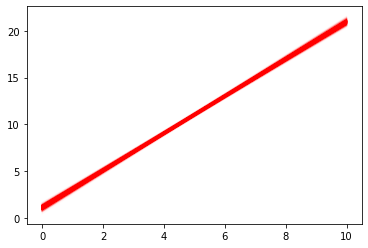

In [25]:
plt.plot(X_new[:100], y_new[:100], 'r', alpha=0.01);

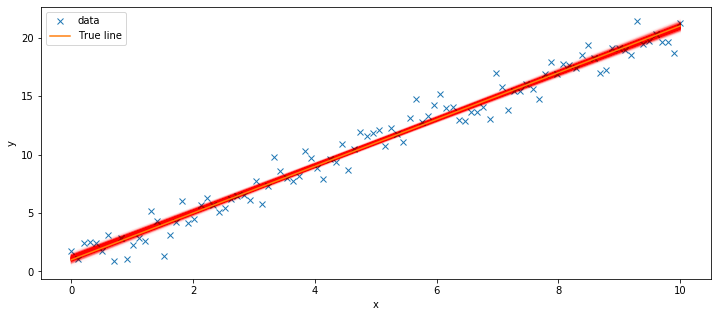

In [26]:
fig = plt.figure(figsize=(12,5)); ax = fig.gca()

plt.plot(X, y, 'x', label='data')
plt.plot(X_new[:100], y_new[:100], 'r', alpha=0.01);
plt.plot(X, true_line, label='True line')
plt.legend(loc=0)
plt.xlabel('x')
plt.ylabel('y');